# Calcolo dei Massimi e dei Minimi
N. Bagnasco

Input: datimm.csv


## Calcolo Max e Min: risultati

### Dataframe

,Massimi (x),Massimi (y),Minimi (x),Minimi (y)
0,540.0,26.4,260.0,10.6
1,1060.0,23.8,780.0,14.3
2,1580.0,22.2,1320.0,16.3
3,2120.0,21.2,1840.0,17.6
4,2640.0,20.7,2380.0,18.4
5,3180.0,20.3,2920.0,19.0
6,3700.0,20.1,3440.0,19.3


### LaTeX Table


\begin{table}[ht]
\centering
\caption{Coordinate di massimi e minimi}
\label{fit502}
\begin{tabular}{rrrr}
\toprule
 Massimi (x) &  Massimi (y) &  Minimi (x) &  Minimi (y) \\
\midrule
       540.0 &         26.4 &       260.0 &        10.6 \\
      1060.0 &         23.8 &       780.0 &        14.3 \\
      1580.0 &         22.2 &      1320.0 &        16.3 \\
      2120.0 &         21.2 &      1840.0 &        17.6 \\
      2640.0 &         20.7 &      2380.0 &        18.4 \\
      3180.0 &         20.3 &      2920.0 &        19.0 \\
      3700.0 &         20.1 &      3440.0 &        19.3 \\
\bottomrule
\end{tabular}
\end{table}



### Figura in LaTeX


\begin{figure}[!ht]
\includegraphics[width=12cm]{ fig7794.png }
\centering
\caption{Scatter dei dati, con minimi e massimi evidenziati}
\end{figure}





### Plot

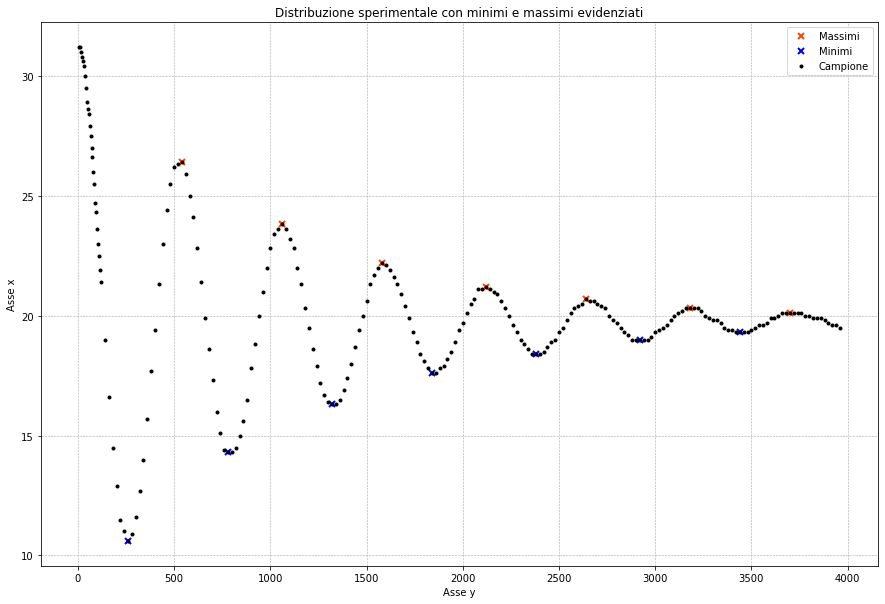

In [158]:
import numpy as np
import scipy
import csv
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import pandas as pd
from random import randint


#Livello di criticità es. (.05)
alpha=.05
unma='cm'
unmb='N'

#Importo dati.csv con tre colonne (x, y, yerr) in tre liste

data = csv.reader(open('datimm.csv', 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
   # lyerrcol.append(row[2])
    
#Converto in array
xxdata = np.asarray(lxcol, dtype=np.float64)
yydata = np.asarray(lycol, dtype=np.float64)
#yerr = np.asarray(lyerrcol, dtype=np.float64)

peaks, _ = find_peaks(yydata)
valleys, _ = find_peaks(inv_yydata)

xxpea=xxdata[peaks]
yypea=yydata[peaks]
inv_yydata = yydata*(-1)
xxvall=xxdata[valleys]
yyvall=yydata[valleys]

###PLOT

plt.rcParams['figure.figsize'] = [15, 10]
randfig=str(randint(0, 9999))
namefig='fig'+randfig+'.png'
fig, ax = plt.subplots()
ax.set_xlabel('Asse y')
ax.set_ylabel('Asse x')
ax.set_title('Distribuzione sperimentale con minimi e massimi evidenziati')

plt.grid(which='both',linestyle='--', linewidth=0.6)
plt.errorbar(xxdata,yydata,fmt='.',color='black')
plt.plot(xxpea, yypea, "rx",color='orangered', mew=2)
plt.plot(xxvall, yyvall, "x",color='blue', mew=2)
plt.legend(['Massimi', 'Minimi', 'Campione'])
#plt.savefig(namefig)


nppeaksx=np.array(xxdata[peaks])
nppeaksy=np.array(yydata[peaks])
npvalleysx=np.array(xxdata[valleys])
npvalleysy=np.array(yydata[valleys])

df = pd.DataFrame({})
df['Massimi (x)'] = nppeaksx.tolist()
df['Massimi (y)'] = nppeaksy.tolist()
df['Minimi (x)'] = npvalleysx.tolist()
df['Minimi (y)'] = npvalleysy.tolist()

display(Markdown('## Calcolo Max e Min: risultati'))
print()
display(Markdown('### Dataframe'))
display(df)
display(Markdown('### LaTeX Table'))
print()
print(df.to_latex(index=False,  caption='Coordinate di massimi e minimi', bold_rows=True, label=indexfit, position='ht'))

#LaTeX image handling
display(Markdown('### Figura in LaTeX'))
print("""
\\begin{figure}[!ht]
\includegraphics[width=12cm]{""",namefig,"""}
\centering
\caption{Scatter dei dati, con minimi e massimi evidenziati}
\end{figure}

""")
print()
display(Markdown('### Plot'))
print()
 